In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# model preprocessing 
from sklearn.preprocessing import LabelEncoder , StandardScaler , Imputer
#train test split
from sklearn.model_selection import train_test_split ,cross_val_score , GridSearchCV

# model building
from sklearn.ensemble import AdaBoostClassifier , AdaBoostRegressor ,RandomForestClassifier ,RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from xgboost import XGBClassifier , XGBRegressor



# Read The Training Dataset

In [2]:
# read the training dataset
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.shape

(4209, 378)

# Read The Test Dataset

In [4]:
# read the test dataset 
df_test = pd.read_csv('test.csv')
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_test.shape

(4209, 377)

# Basic Data Exploration

In [6]:
# basic data exploration
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


None

In [7]:
# checking for dtypes of both training and test dataset
display(df_train.dtypes)
print()
display(df_test.dtypes)

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [8]:
# now choose only the object data types and display them 
display(df_train.select_dtypes(['object'])) # show only object data type for training data
print()
display(df_test.select_dtypes(['object'])) # show only object data type for testing data

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


## Apply Label Enconder

In [9]:
# now we need to change cat to numerical as ml algorithm won't continue with categorical variabl
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cat = ['X0','X1','X2','X3','X4','X5','X6','X8']
for i in cat:
    df_train[i] = label_encoder.fit_transform(df_train[i])
    df_test[i] = label_encoder.fit_transform(df_test[i])


In [10]:
# now check whether convert into numerical value or not
display(df_train.head())
print()
display(df_test.head())

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


*** check for null value

In [11]:
# for training data set 
display(sum(df_train.isnull().values,0)) # it gives the index  at which column value is null for training dataset
print()
display(sum(df_test.isnull().values,0)) # it gives the index  at which column value is null for testing dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### from above we can conclude that there is no null value in the training data set and testing data set

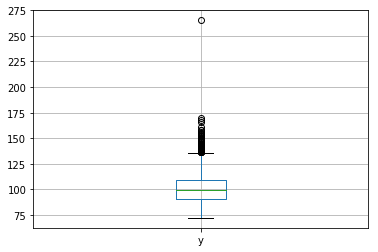

In [12]:
# now checking for outlier in testing data set for this we can use on target vaariable
import matplotlib.pyplot  as plt
%matplotlib inline
df_train.boxplot('y')

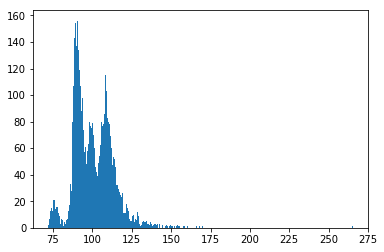

In [13]:
# now checking for outlier in testing data set for this we can use on target vaariable
import matplotlib.pyplot  as plt
%matplotlib inline
plt.hist(df_train.y,bins=300)
plt.show()

In [14]:
# Check unique value in train and test dataset
display(np.unique(df_train))
print()
display(np.unique(df_test))

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 8.412e+03, 8.415e+03,
       8.417e+03])

array([   0,    1,    2, ..., 8413, 8414, 8416], dtype=int64)

In [15]:
# check for variance if variance is zero remove that column training and testing dataset

display(df_train.loc[:,df_train.var()==0])
print()
display(df_test.loc[:,df_test.var()==0])

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0


,X257,X258,X295,X296,X369
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4204,0,0,0,0,0
4205,0,0,0,0,0
4206,0,0,0,0,0
4207,0,0,0,0,0


In [16]:
# training and testing dataset after removing the variacne equal to 0 column
df_train = df_train.drop(['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'],axis=1)
df_test = df_test.drop(['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'],axis=1)

In [17]:
# now check the shape after all preprocessing done
display(df_train.shape)
print()
display(df_test.shape)

(4209, 366)

(4209, 365)

In [18]:
# describe the dataset
display('training dataset describe : ' ,df_train.describe())
print()
display('testing dataset describe : ' ,df_test.describe())

'training dataset describe : '

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,29.760751,11.113566,17.306486,2.919696,2.997862,13.340223,6.807318,11.611309,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,13.738338,8.531001,10.899914,1.739912,0.073900,8.250832,2.916973,7.037888,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,19.000000,3.000000,8.000000,2.000000,3.000000,5.000000,6.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,35.000000,13.000000,16.000000,2.000000,3.000000,15.000000,7.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,43.000000,20.000000,25.000000,5.000000,3.000000,21.000000,9.000000,18.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,46.000000,26.000000,43.000000,6.000000,3.000000,28.000000,11.000000,24.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'testing dataset describe : '

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,30.515324,11.075315,17.780708,2.933476,2.997149,15.023046,6.850558,11.558090,0.019007,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,15.221177,8.544520,10.227319,1.776977,0.078553,8.667149,2.868017,7.016379,0.136565,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,20.000000,3.000000,10.000000,2.000000,3.000000,6.000000,6.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,36.000000,13.000000,17.000000,2.000000,3.000000,17.000000,7.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,45.000000,20.000000,23.000000,5.000000,3.000000,23.000000,9.000000,18.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,48.000000,26.000000,44.000000,6.000000,3.000000,31.000000,11.000000,24.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# now separate the dependent and independent variable 
df_train_X = df_train.drop(['ID','y'],axis=1)
df_train_y = df_train.y

# now for test data we need to remove the identity column
df_test_X = df_test.drop('ID',axis=1)


In [20]:
from sklearn.preprocessing import scale
df_train_X = pd.DataFrame(scale(df_train_X))
df_test_X = pd.DataFrame(scale(df_test_X))

# Now Apply the PCA 

### Dimesionality Reduction

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95,random_state=100)
# transforming the training data
pca.fit(df_train_X)
df_transformed_train_X = pca.transform(df_train_X)
display('Shape of training data before transformed {}'.format(df_train_X.shape))
display('Shape of training data after transformed {}'.format(df_transformed_train_X.shape))


'Shape of training data before transformed (4209, 364)'

'Shape of training data after transformed (4209, 148)'

In [22]:
pca

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
# transforming the test data 
df_transformed_test_X =pca.transform(df_test_X)
print('Shape of training data before transformed ',df_test_X.shape)
print('Shape of training data after transformed ',df_transformed_test_X.shape)

Shape of training data before transformed  (4209, 364)
Shape of training data after transformed  (4209, 148)


# Now Use the XGBOOST for prediction

# xgboost with default parameter

In [24]:
# instantiate the model
xgb_default =XGBRegressor()
# fit the training data 
xgb_default.fit(df_transformed_train_X,df_train_y)

# predict
xgb_predict = xgb_default.predict(df_transformed_test_X)

[17:16:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
# now check for r2-square value and mean absolute error
from sklearn.metrics import r2_score ,mean_absolute_error
r2_score_xgb_default =r2_score(df_train_y,xgb_predict)
display('r2-score with the default paramer {}'.format(r2_score(df_train_y,xgb_predict)))
print()
mse_xgb_default =mean_absolute_error(df_train_y,xgb_predict)
display('mean absolute error with the default paramer {}'.format(mse_xgb_default))


'r2-score with the default paramer -0.4295836359899434'

'mean absolute error with the default paramer 11.8355800230788'

In [26]:
xgb_default

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Now tuned the hyperparameter using Gridsearchcv

In [27]:
warnings.filterwarnings("ignore",category= DeprecationWarning)
warnings.filterwarnings("ignore", category= FutureWarning)
param_grid ={'n_estimators':[20,40,60,80],'learning_rate':[0.1,0.01,0.001,0.0001],'max_depth':[2,4,6,8]}
xgb_tuned = GridSearchCV(XGBRegressor(),param_grid=param_grid ,refit=True)
# fit the training data to model
xgb_tuned.fit(df_transformed_train_X ,df_train_y)
# predict 
xgb_tuned_predict = xgb_tuned.predict(df_transformed_test_X)




[17:16:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:26] WARNI

[17:19:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:49] WARNI

[17:22:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:41] WARNI

[17:25:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:25:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:25:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:25:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:25:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:25:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:25:30] WARNI

In [28]:
# check for model r2_score
r2_score_xbg_tuned =r2_score(df_train_y,xgb_tuned_predict)
display('r2-score with the default paramer {}'.format(r2_score_xbg_tuned))
print()
mse_xgb_tuned =mean_absolute_error(df_train_y,xgb_tuned_predict)
display('mean absolute error with the default paramer {}'.format(mse_xgb_tuned))

'r2-score with the default paramer -0.446269927797605'

'mean absolute error with the default paramer 11.929246001928997'

In [29]:
# SEE THE BEST PARAMETER 
print(xgb_tuned.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 80}


In [30]:
# Now predict the same thing using Adaboost
ada_boost_default = AdaBoostRegressor()
ada_boost_default.fit(df_transformed_train_X,df_train_y)
ada_boost_pred = ada_boost_default.predict(df_transformed_test_X)
r2_score_adaboost_default =r2_score(df_train_y,ada_boost_pred)
display('r2-score with the default paramer {}'.format(r2_score_adaboost_default))
print()
mse_adaboost_default =mean_absolute_error(df_train_y,ada_boost_pred)
display('mean absolute error with the default paramer {}'.format(mse_adaboost_default))

'r2-score with the default paramer -0.47713472107514554'

'mean absolute error with the default paramer 12.353508209979465'

In [31]:
ada_boost_default

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

# now tuned the hyperparameter of adaboost

In [32]:
param_grid ={'n_estimators':[20,40,60,80] ,'learning_rate':[0.1,0.01,0.001,0.0001]}
adaboost_tuned =GridSearchCV(AdaBoostRegressor(),param_grid=param_grid,refit=True)
adaboost_tuned.fit(df_transformed_train_X,df_train_y)
adaboost_tuned_predict = adaboost_tuned.predict(df_transformed_test_X)

In [33]:
#now check r2_score 
r2_score_adaboost_tuned =r2_score(df_train_y,adaboost_tuned_predict)
display('r2-score with the default paramer {}'.format(r2_score_adaboost_tuned))
print()
mse_adaboost_tuned =mean_absolute_error(df_train_y,adaboost_tuned_predict)
display('mean absolute error with the default paramer {}'.format(mse_adaboost_tuned))

'r2-score with the default paramer -0.24813943885025624'

'mean absolute error with the default paramer 11.150853160277029'

In [34]:
# best parameter  for Adaboost
display('best parameter for adaboost ' ,adaboost_tuned.best_params_)


'best parameter for adaboost '

{'learning_rate': 0.01, 'n_estimators': 60}

# Predict Using Linear Regression

In [35]:
#As target variable is continous we can also use the Linear Regression and Lasso
from sklearn.linear_model import LinearRegression # import the model
# instantiate the model
Lin_R  =LinearRegression()
#fit the training data 
Lin_R.fit(df_transformed_train_X,df_train_y)
#now predict
linear_predict = Lin_R.predict(df_transformed_test_X)


In [36]:
#now find the r2_score and mse 
r2_score_linear = r2_score(df_train_y,linear_predict)
display('r2-score of Linear Regression {}'.format(r2_score_linear))
print()
mse_linear = mean_absolute_error(df_train_y,linear_predict)
display('Mean absolute error with Linear Regression {}'.format(mse_linear))

'r2-score of Linear Regression -0.584315853277285'

'Mean absolute error with Linear Regression 12.41960936137683'

# Predict Using Ridge , Lasso

In [37]:
# import module 
from sklearn.linear_model import Ridge , Lasso
#instantiate the model with low alpha 
rr_low = Ridge(alpha=0.1)
#fit the training data
rr_low.fit(df_transformed_train_X,df_train_y)
#predict 
ridge_low_predict = rr_low.predict(df_transformed_test_X)

In [38]:
# check the r2_score and mse
r2_score_ridge = r2_score(df_train_y,ridge_low_predict)
display('r2-score of Ridge Regression {}'.format(r2_score_ridge))
print()
mse_ridge = mean_absolute_error(df_train_y,ridge_low_predict)
display('Mean absolute error with Ridge Regression {}'.format(mse_ridge ))

'r2-score of Ridge Regression -0.5843089129686554'

'Mean absolute error with Ridge Regression 12.41958118649917'

#### Ridge with high alpha value =100

In [39]:

#instantiate the model with high alpha 
rr_high = Ridge(alpha=100)
#fit the training data
rr_high.fit(df_transformed_train_X,df_train_y)
#predict 
ridge_high_predict = rr_high.predict(df_transformed_test_X)

In [40]:
# check the r2_score and mse with high value
r2_score_ridge100 = r2_score(df_train_y,ridge_high_predict)
display('r2-score of Ridge Regression {}'.format(r2_score_ridge100))
print()
mse_ridge100 = mean_absolute_error(df_train_y,ridge_high_predict)
display('Mean absolute error with Ridge Regression {}'.format(mse_ridge100 ))

'r2-score of Ridge Regression -0.5775278658756944'

'Mean absolute error with Ridge Regression 12.392365259785267'

# now we can predict the samething using lasso

In [41]:
#instantiate the model with low alpha 
ll_low = Lasso(alpha=0.1)
#fit the training data
ll_low.fit(df_transformed_train_X,df_train_y)
#predict 
lasso_low_predict = ll_low.predict(df_transformed_test_X)

In [42]:
# check the r2_score and mse with high value
r2_score_lasso = r2_score(df_train_y,lasso_low_predict)
display('r2-score of Lasso Regression {}'.format(r2_score_lasso))
print()
mse_lasso = mean_absolute_error(df_train_y,lasso_low_predict)
display('Mean absolute error with Lasso Regression {}'.format(mse_lasso ))

'r2-score of Lasso Regression -0.5299823518701827'

'Mean absolute error with Lasso Regression 12.20472662853313'

In [43]:
#instantiate the model with high alpha 
ll_high = Lasso(alpha=100)
#fit the training data
ll_high.fit(df_transformed_train_X,df_train_y)
#predict 
lasso_high_predict = ll_high.predict(df_transformed_test_X)

In [44]:
# check the r2_score and mse with high value
r2_score_lasso100 = r2_score(df_train_y,lasso_high_predict)
display('r2-score of Lasso Regression {}'.format(r2_score_lasso100))
print()
mse_lasso100 = mean_absolute_error(df_train_y,lasso_high_predict)
display('Mean absolute error with Lasso Regression {}'.format(mse_lasso100 ))

'r2-score of Lasso Regression 0.0'

'Mean absolute error with Lasso Regression 10.088697213502547'

# Comparing the all R2_SCORE and MSE of All model

In [45]:
# import the pretty table module
from prettytable import PrettyTable
pt = PrettyTable(['Model Name','R2_Score ','MSE'])
pt.add_row(['XGBOOST Default',r2_score_xgb_default , mse_xgb_default])
pt.add_row(['XGBOOST Tuned',r2_score_xbg_tuned , mse_xgb_tuned])
pt.add_row(['ADABOOST Default',r2_score_adaboost_default , mse_adaboost_default])
pt.add_row(['ADABOOST Tuned',r2_score_adaboost_tuned , mse_adaboost_tuned])
pt.add_row(['Limear Regression',r2_score_linear , mse_linear])
pt.add_row(['Ridge With Low Alpha',r2_score_ridge , mse_ridge])
pt.add_row(['Ridge With High Alpha',r2_score_ridge100 , mse_ridge100])
pt.add_row(['Lasso With Low Alpha',r2_score_lasso , mse_lasso])
pt.add_row(['Lasso With High Alpha',r2_score_lasso100 , mse_lasso100])
print(pt)

+-----------------------+----------------------+--------------------+
|       Model Name      |      R2_Score        |        MSE         |
+-----------------------+----------------------+--------------------+
|    XGBOOST Default    | -0.4295836359899434  |  11.8355800230788  |
|     XGBOOST Tuned     |  -0.446269927797605  | 11.929246001928997 |
|    ADABOOST Default   | -0.47713472107514554 | 12.353508209979465 |
|     ADABOOST Tuned    | -0.24813943885025624 | 11.150853160277029 |
|   Limear Regression   |  -0.584315853277285  | 12.41960936137683  |
|  Ridge With Low Alpha | -0.5843089129686554  | 12.41958118649917  |
| Ridge With High Alpha | -0.5775278658756944  | 12.392365259785267 |
|  Lasso With Low Alpha | -0.5299823518701827  | 12.20472662853313  |
| Lasso With High Alpha |         0.0          | 10.088697213502547 |
+-----------------------+----------------------+--------------------+
